# Thesis Experimental Results Plotting

This notebook contains all the plotting logic for generating thesis figures from W&B data.
You can run cells step-by-step and modify parameters as needed.

## 1. Setup and Imports


In [1]:
# Import required libraries
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from datetime import datetime

# Set style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

# Configure matplotlib for better quality
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 11
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10


## 2. Load W&B Data


In [2]:
# Configuration
data_dir = '../wandb_data_20250903_094505_deduped'  # Adjust path as needed
output_dir = '../plots/thesis_figures'
os.makedirs(output_dir, exist_ok=True)

# Load metadata
with open(os.path.join(data_dir, 'all_runs_metadata.json'), 'r') as f:
    metadata = json.load(f)

print(f"Loaded metadata for {len(metadata)} runs")


Loaded metadata for 57 runs


In [3]:
# Import the plotting functions
import sys
sys.path.append('..')
from thesis_plotting_functions import *

# Load data
data_dir = '../wandb_data_20250903_094505_deduped'
output_dir = '../plots/thesis_figures'

# Load metadata
with open(os.path.join(data_dir, 'all_runs_metadata.json'), 'r') as f:
    metadata = json.load(f)

# Load all run data
runs_data = load_run_data(data_dir, metadata)


Loaded 51 runs with history data


## 3. Generate Learning Curves (PPO vs PPO-Lagrange with bound=0.2 only)


Environment: ant_velocity_constrained
  PPO runs: 0 (seeds: [])
  PPO-Lagrange (bound=0.2) runs: 5 (seeds: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)])
Saved to ../plots/thesis_figures/ant_velocity_constrained_learning_curves.png


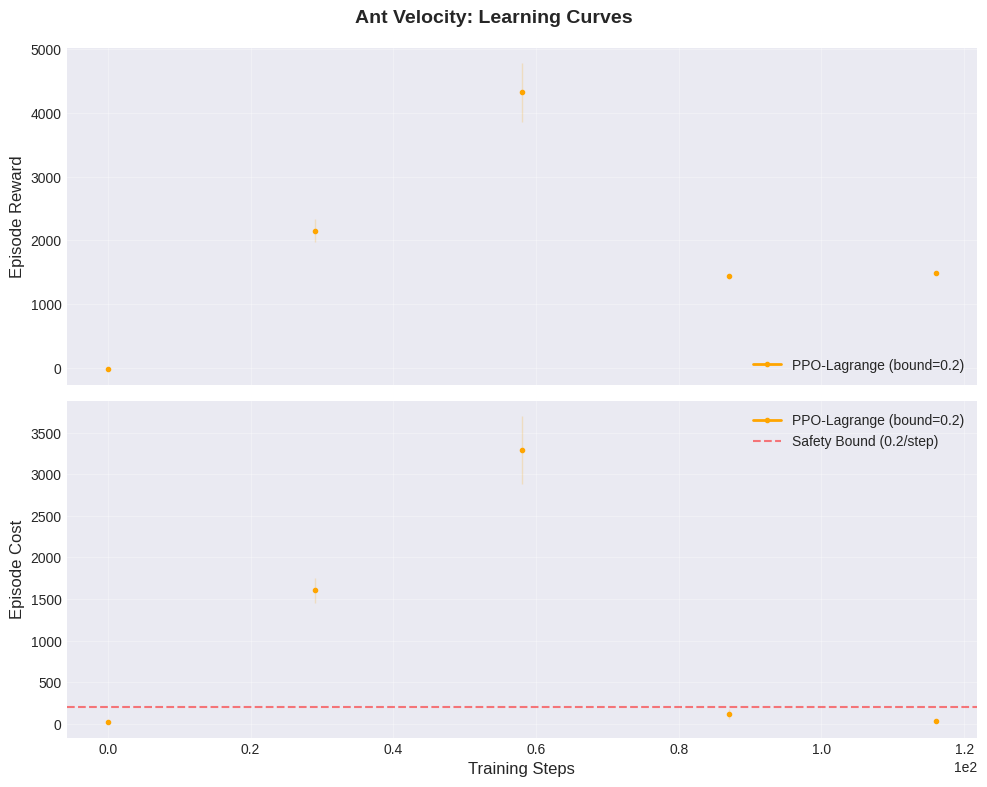


Environment: humanoid_height_constrained
  PPO runs: 0 (seeds: [])
  PPO-Lagrange (bound=0.2) runs: 5 (seeds: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)])
Saved to ../plots/thesis_figures/humanoid_height_constrained_learning_curves.png


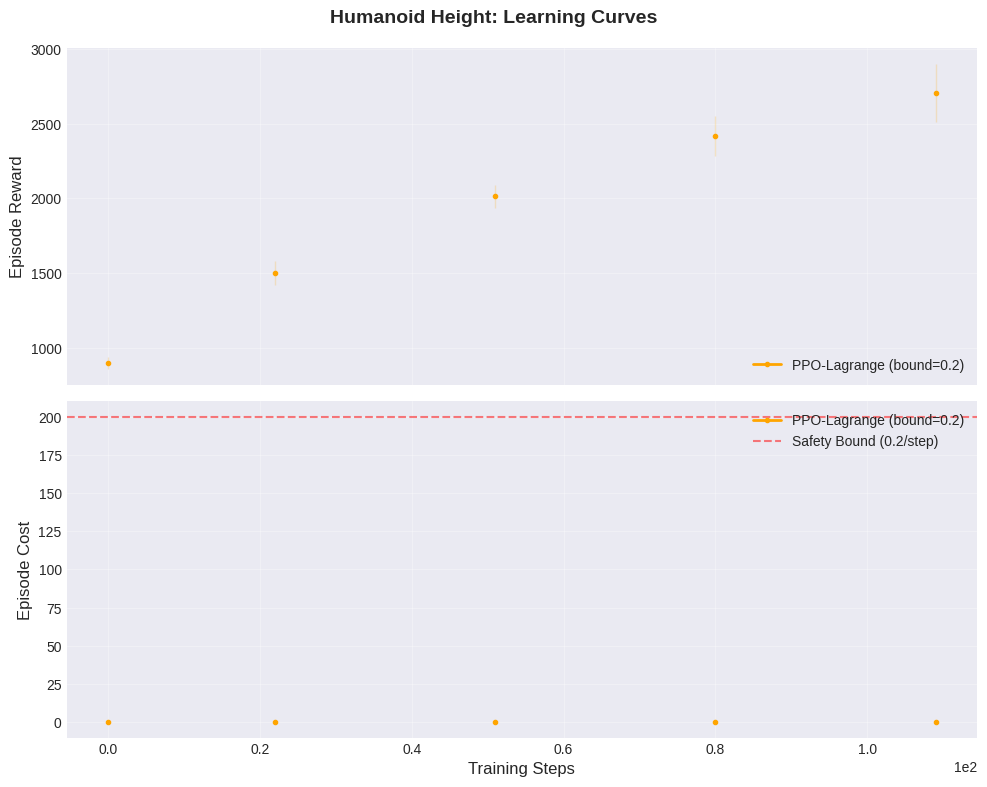


Environment: point_resetting_goal_random_hazard_lidar_sensor_obs
  PPO runs: 0 (seeds: [])
  PPO-Lagrange (bound=0.2) runs: 0 (seeds: [])


/home/mrdbstn/school/safe-brax/safe-brax/thesis_plotting_functions.py:187: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend(loc='lower right')
/home/mrdbstn/school/safe-brax/safe-brax/thesis_plotting_functions.py:227: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend(loc='upper right')


Saved to ../plots/thesis_figures/point_resetting_goal_random_hazard_lidar_sensor_obs_learning_curves.png


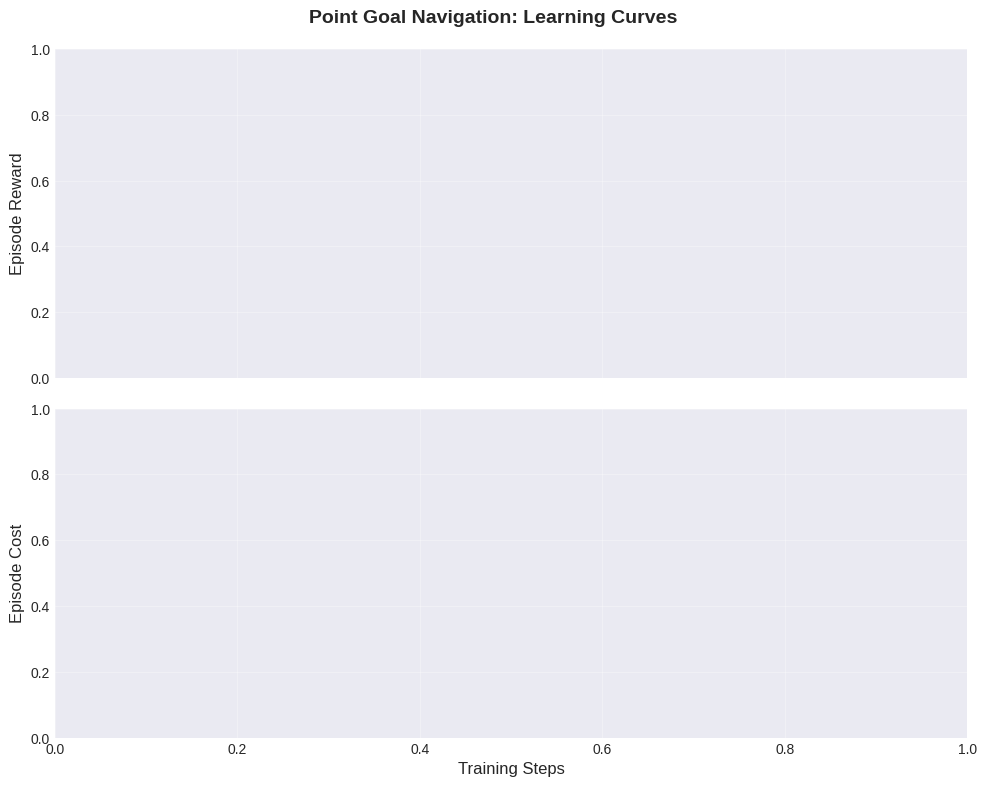

In [4]:
# Generate learning curves for each environment
environments = [
    'ant_velocity_constrained',
    'humanoid_height_constrained',
    'point_resetting_goal_random_hazard_lidar_sensor_obs'  # This is safe_point_goal
]

for env in environments:
    save_path = os.path.join(output_dir, f"{env}_learning_curves.png")
    fig = create_learning_curves(runs_data, env, safety_bound=0.2, save_path=save_path)
    print()


## 4. Generate Safety-Performance Tradeoff (All PPO-Lagrange bounds)


Saved to ../plots/thesis_figures/safety_performance_tradeoff.png


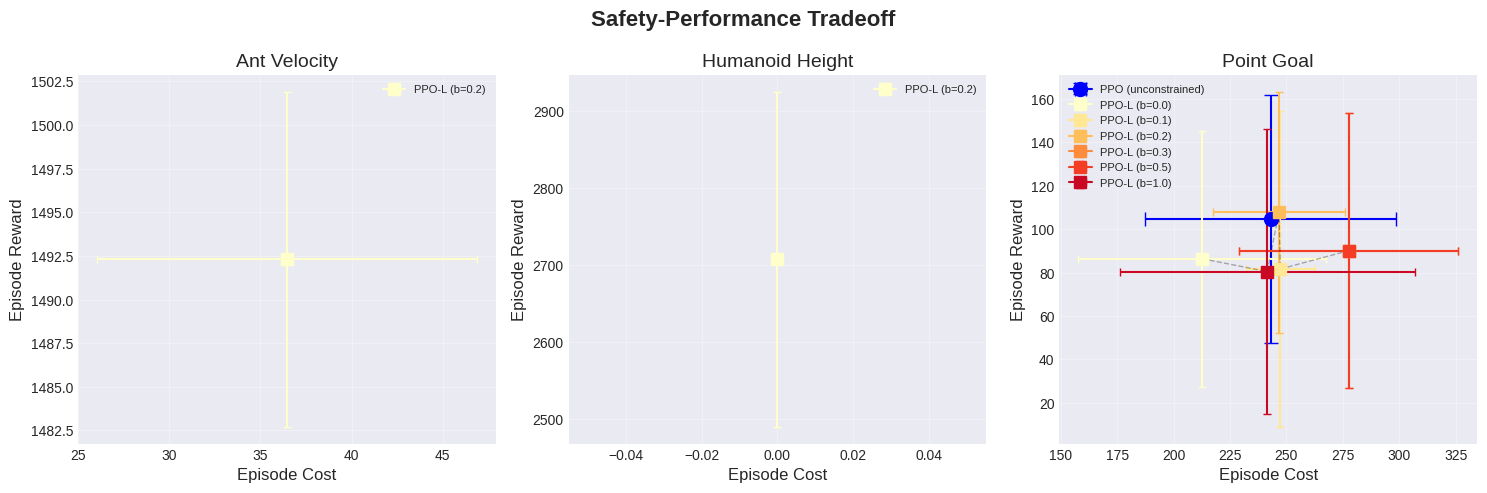

In [5]:
# Create safety-performance tradeoff plot
save_path = os.path.join(output_dir, "safety_performance_tradeoff.png")
fig = create_safety_performance_tradeoff(runs_data, save_path=save_path)


## 5. Generate All Plots at Once


Loaded metadata for 57 runs
Loaded 51 runs with history data

Generating Learning Curves...
Environment: ant_velocity_constrained
  PPO runs: 0 (seeds: [])
  PPO-Lagrange (bound=0.2) runs: 5 (seeds: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)])
Saved to ../plots/thesis_figures/ant_velocity_constrained_learning_curves.png


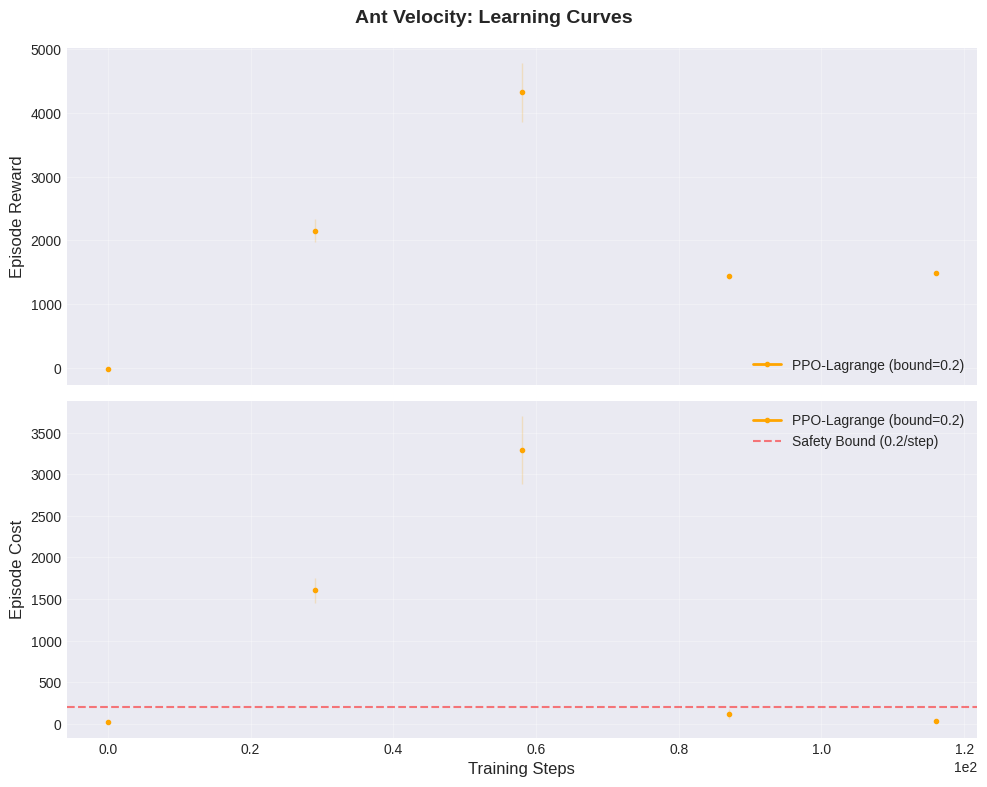


Environment: humanoid_height_constrained
  PPO runs: 0 (seeds: [])
  PPO-Lagrange (bound=0.2) runs: 5 (seeds: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)])
Saved to ../plots/thesis_figures/humanoid_height_constrained_learning_curves.png


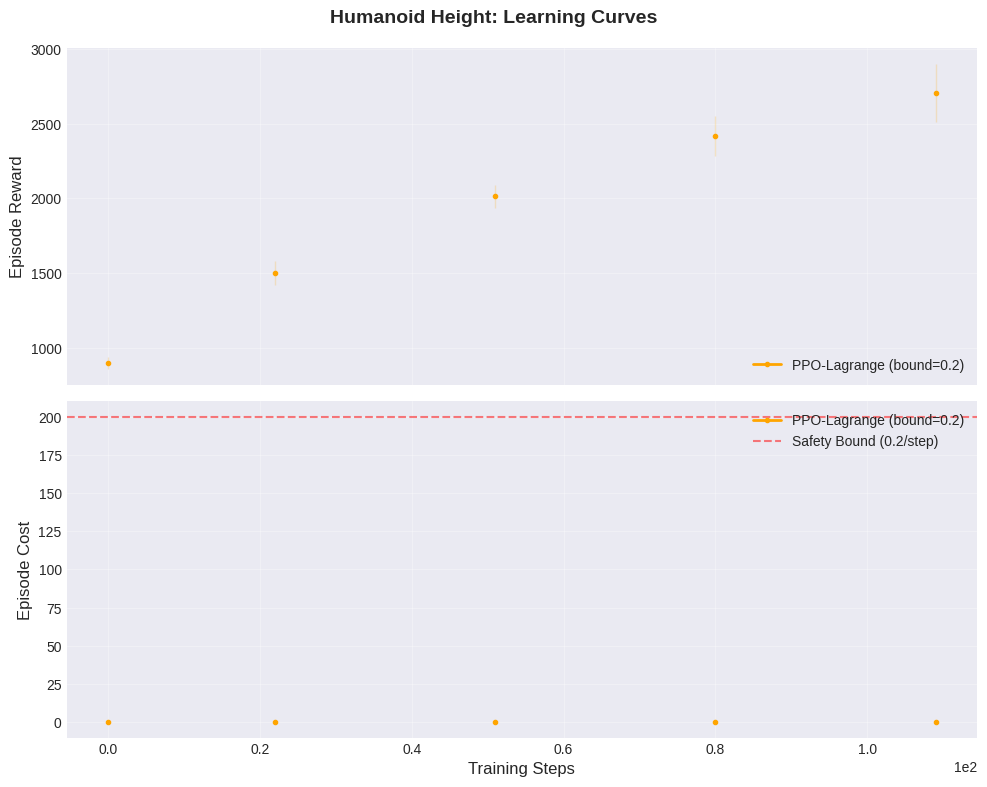


Environment: safe_point_goal
  PPO runs: 5 (seeds: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)])
  PPO-Lagrange (bound=0.2) runs: 5 (seeds: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)])
Saved to ../plots/thesis_figures/safe_point_goal_learning_curves.png


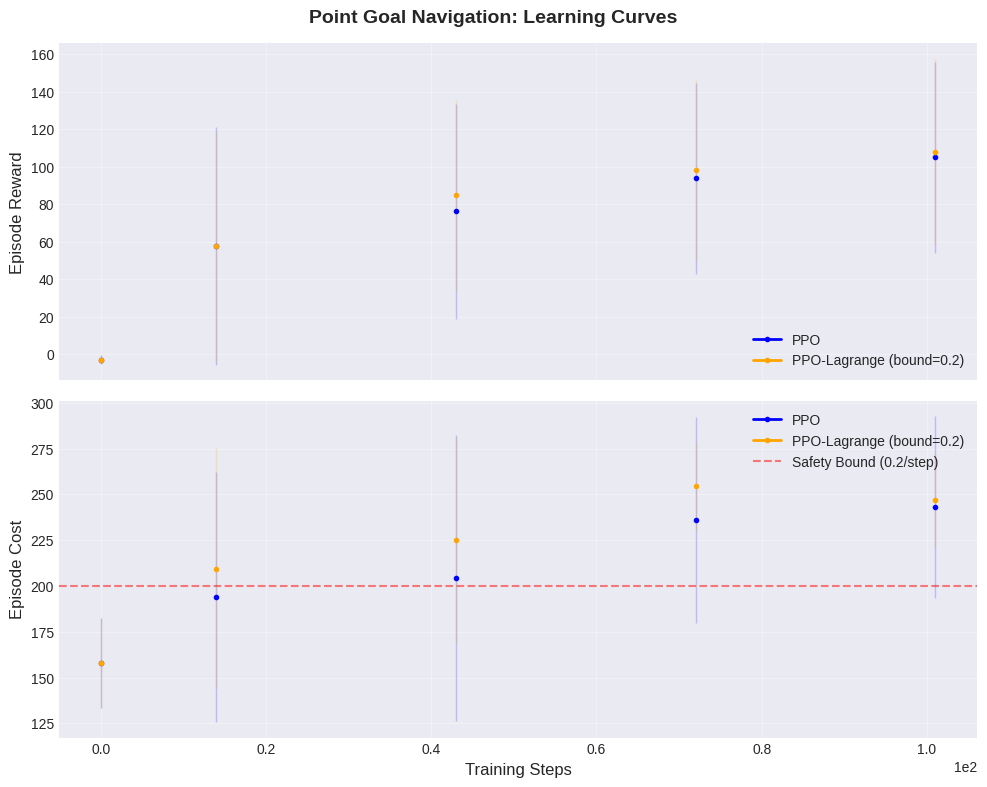



Generating Safety-Performance Tradeoff...
Saved to ../plots/thesis_figures/safety_performance_tradeoff.png


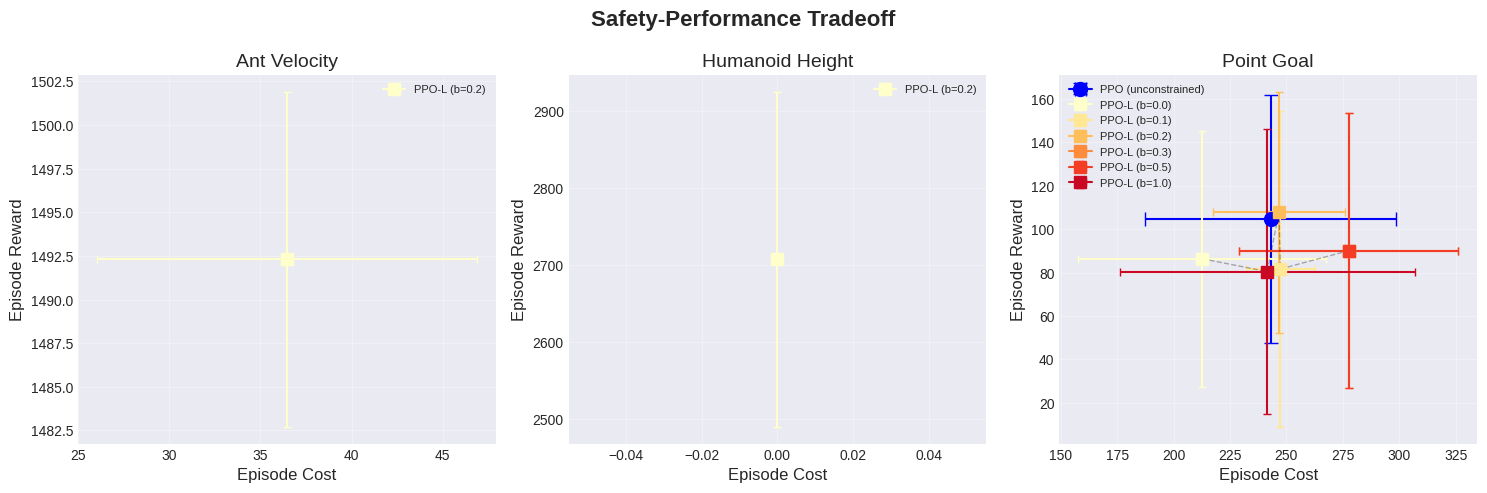


Generating Lambda Evolution Plots...
Saved to ../plots/thesis_figures/ant_velocity_constrained_lambda_evolution.png


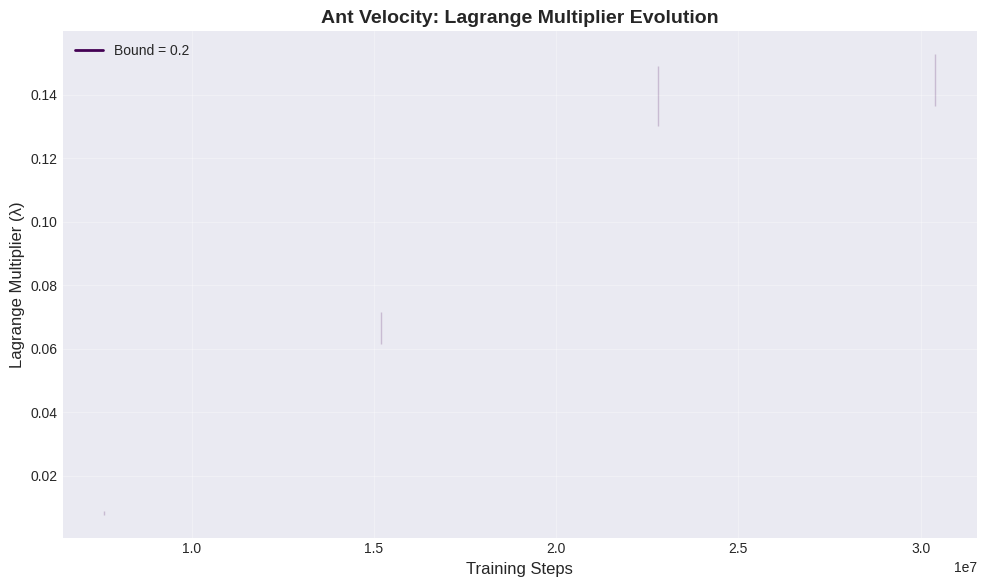


Saved to ../plots/thesis_figures/humanoid_height_constrained_lambda_evolution.png


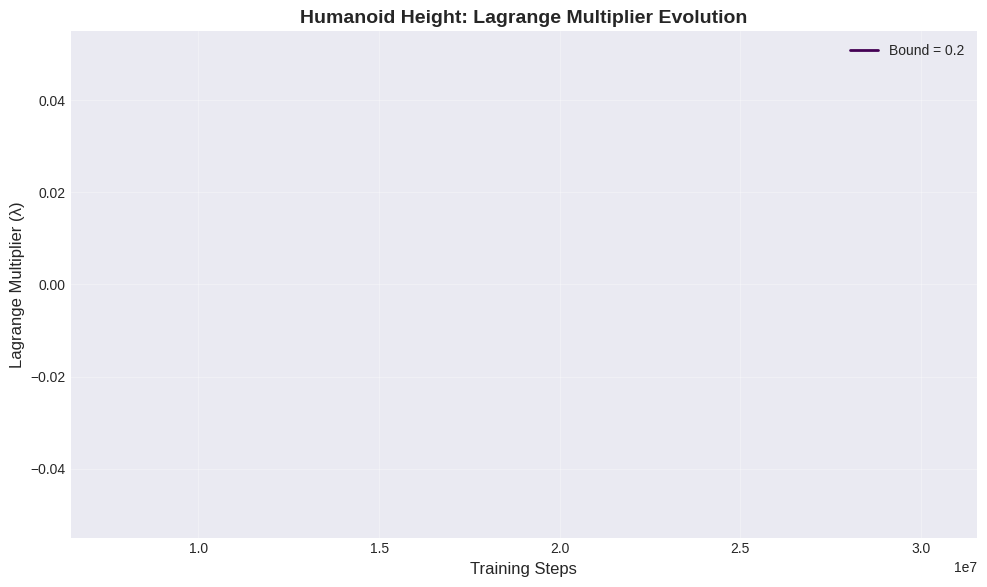


Saved to ../plots/thesis_figures/safe_point_goal_lambda_evolution.png


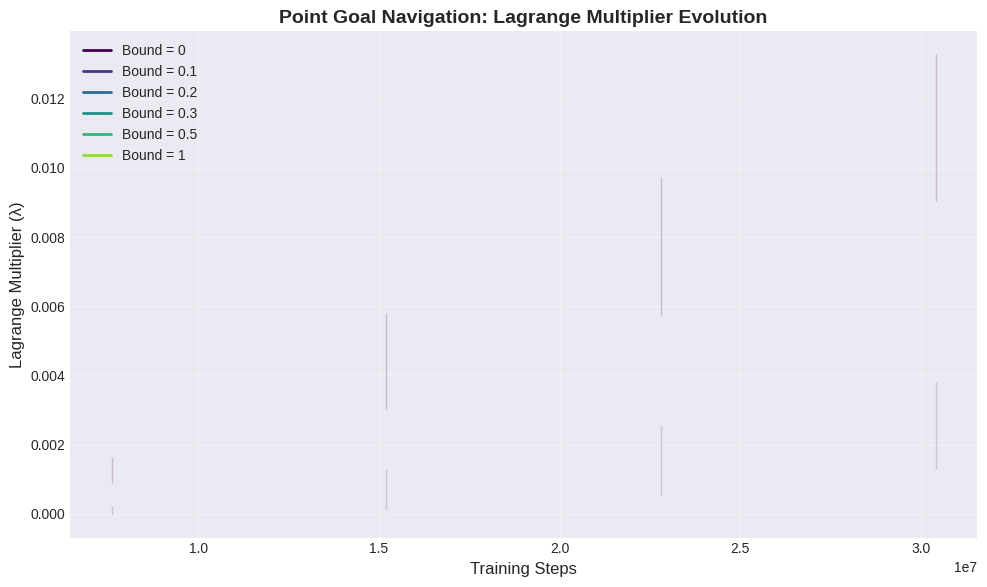



Generating Final Performance Comparisons...
Saved to ../plots/thesis_figures/ant_velocity_constrained_final_performance.png


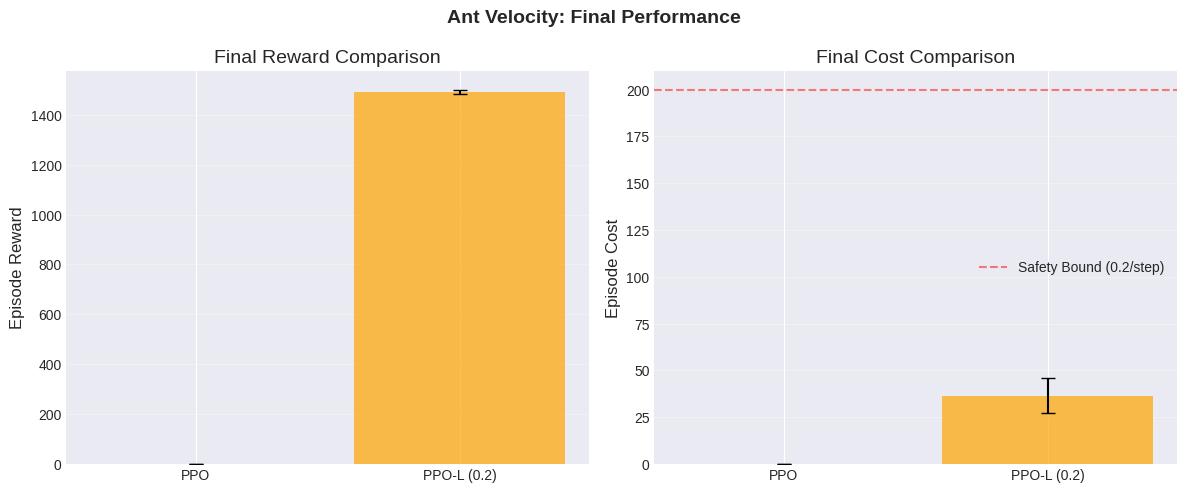


Saved to ../plots/thesis_figures/humanoid_height_constrained_final_performance.png


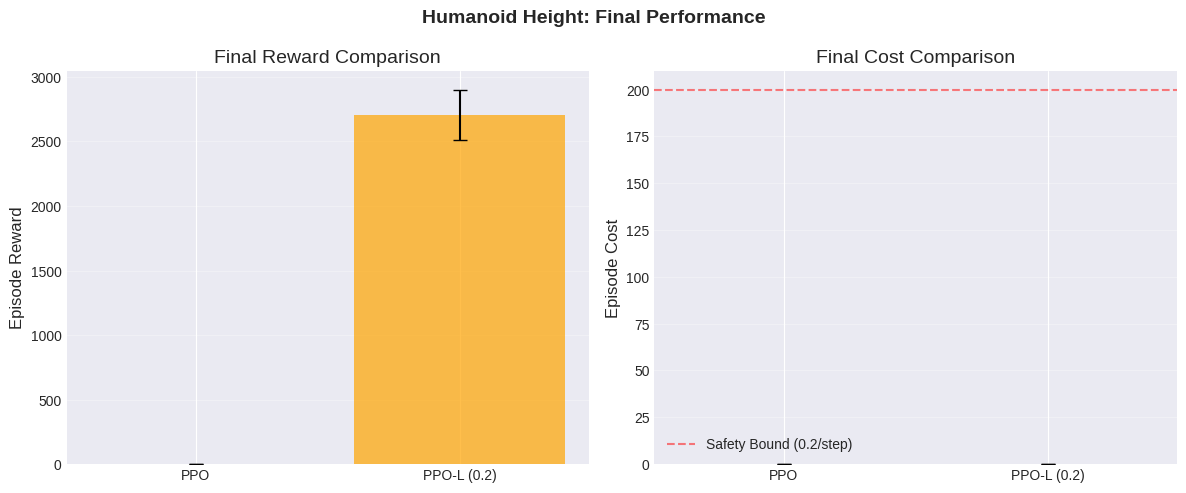


Saved to ../plots/thesis_figures/safe_point_goal_final_performance.png


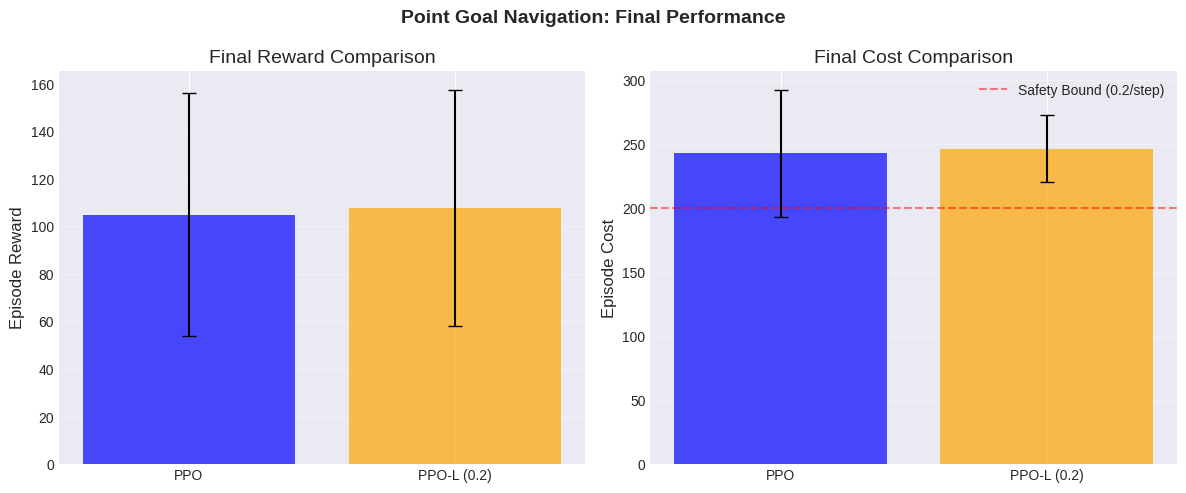



Creating Summary Table...

Experimental Results Summary (PPO vs PPO-Lagrange with bound=0.2)
                Environment    Algorithm Safety Bound  Seeds    Mean Reward    Mean Cost
   ant_velocity_constrained PPO-Lagrange          0.2      5   1492.3 ± 8.6   36.4 ± 9.3
humanoid_height_constrained PPO-Lagrange          0.2      5 2707.5 ± 194.8    0.0 ± 0.0
            safe_point_goal          PPO          N/A      5   104.9 ± 51.1 243.1 ± 49.8
            safe_point_goal PPO-Lagrange          0.2      5   107.9 ± 49.6 246.7 ± 26.1

Saved summary to ../plots/thesis_figures/experiment_summary.csv

All plots generated and saved to ../plots/thesis_figures


In [6]:
# Generate all plots at once
generate_all_plots(data_dir='../wandb_data_20250903_094505_deduped', 
                  output_dir='../plots/thesis_figures')


In [ ]:
# Import the plotting functions
import sys
sys.path.append('..')
from thesis_plotting_functions import *

# Load data
data_dir = '../wandb_data_20250903_094505_deduped'
output_dir = '../plots/thesis_figures'

# Load metadata
with open(os.path.join(data_dir, 'all_runs_metadata.json'), 'r') as f:
    metadata = json.load(f)

# Load all run data
runs_data = load_run_data(data_dir, metadata)


Loaded 51 runs with history data


## 5. Lambda Evolution (PPO-Lagrange)


Saved to ../plots/thesis_figures/ant_velocity_constrained_lambda_evolution.png


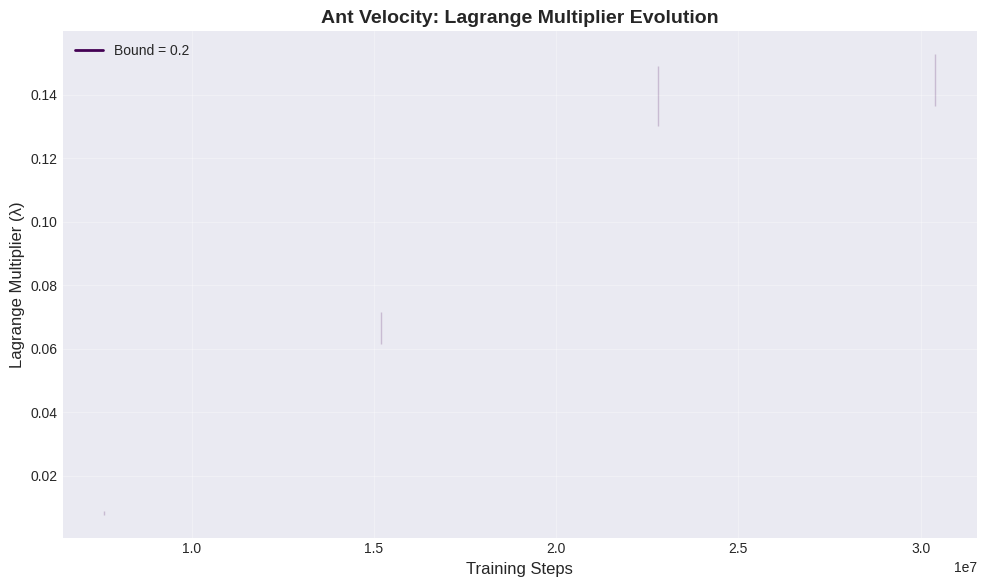

Saved to ../plots/thesis_figures/humanoid_height_constrained_lambda_evolution.png


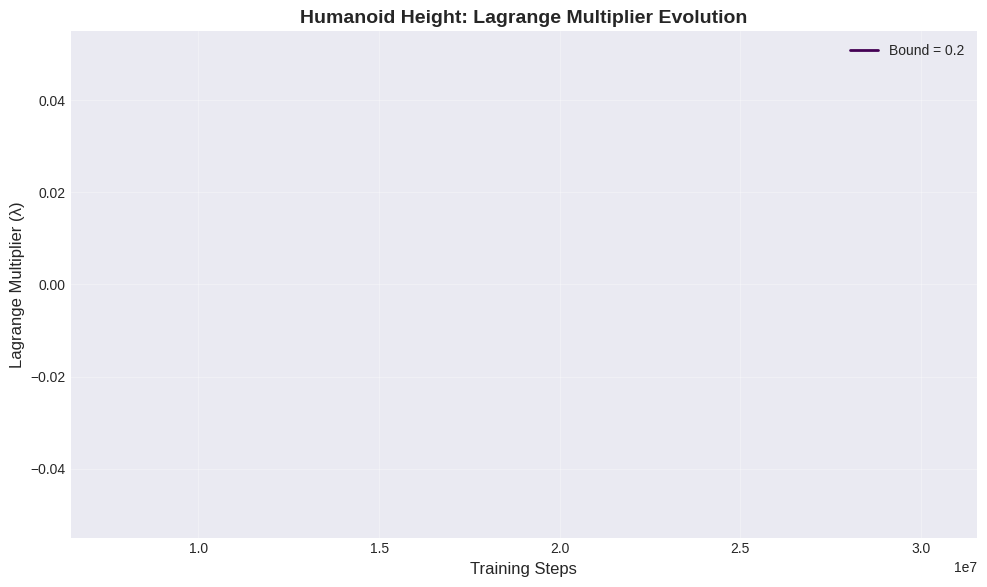

No PPO-Lagrange data found for point_resetting_goal_random_hazard_lidar_sensor_obs


In [7]:
# Lambda evolution plots
for env in environments:
    save_path = os.path.join(output_dir, f"{env}_lambda_evolution.png")
    _ = create_lambda_evolution(runs_data, env, save_path=save_path)


## 6. Final Performance Comparisons (PPO vs PPO-L @ bound 0.2)


Saved to ../plots/thesis_figures/ant_velocity_constrained_final_performance.png


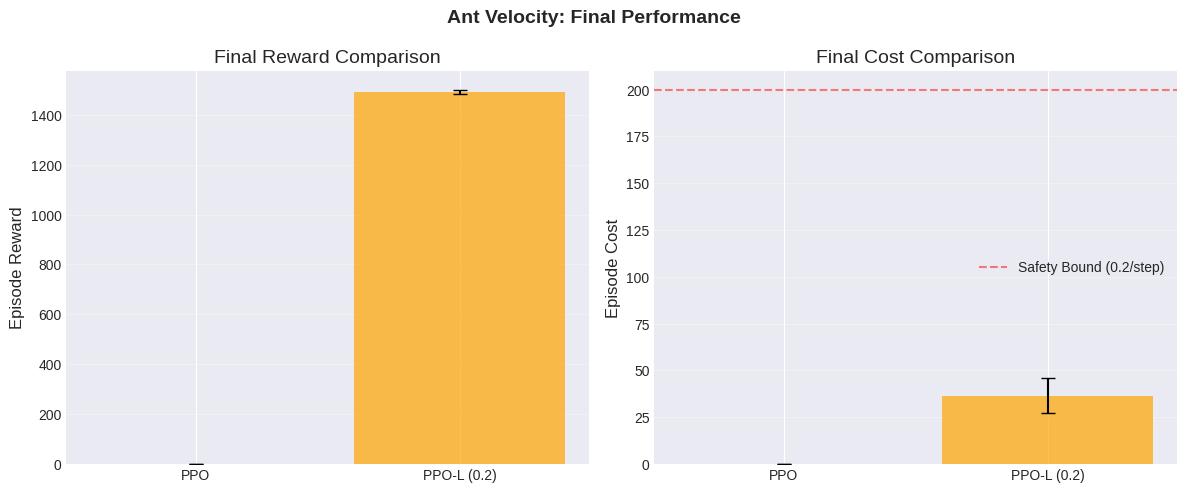

Saved to ../plots/thesis_figures/humanoid_height_constrained_final_performance.png


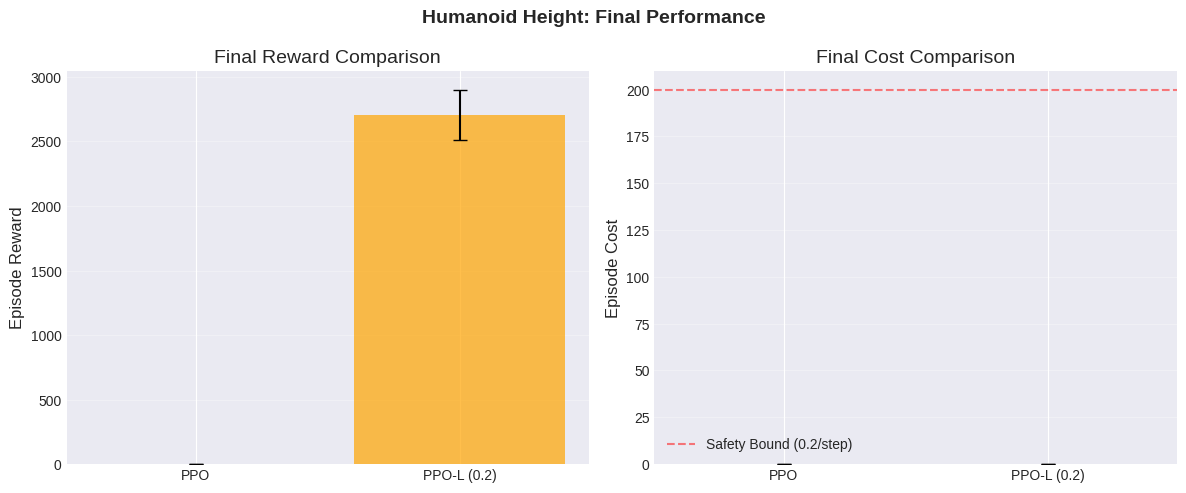

Saved to ../plots/thesis_figures/point_resetting_goal_random_hazard_lidar_sensor_obs_final_performance.png


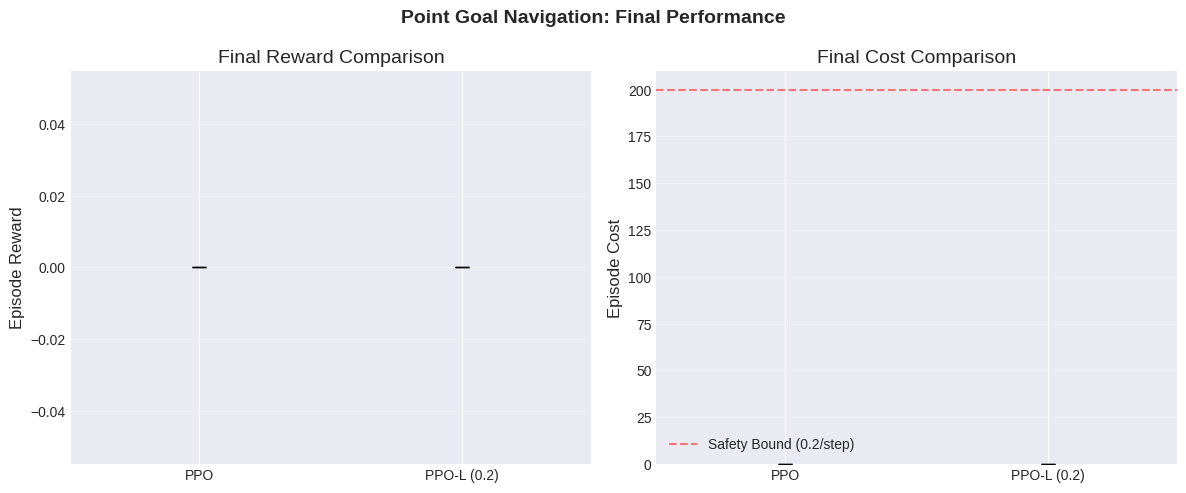

In [8]:
# Final performance bar charts (reward and cost)
for env in environments:
    save_path = os.path.join(output_dir, f"{env}_final_performance.png")
    _ = create_final_performance_comparison(runs_data, env, safety_bound=0.2, save_path=save_path)


## 7. Safety-Performance Tradeoff (Pareto)


Saved to ../plots/thesis_figures/safety_performance_tradeoff.png


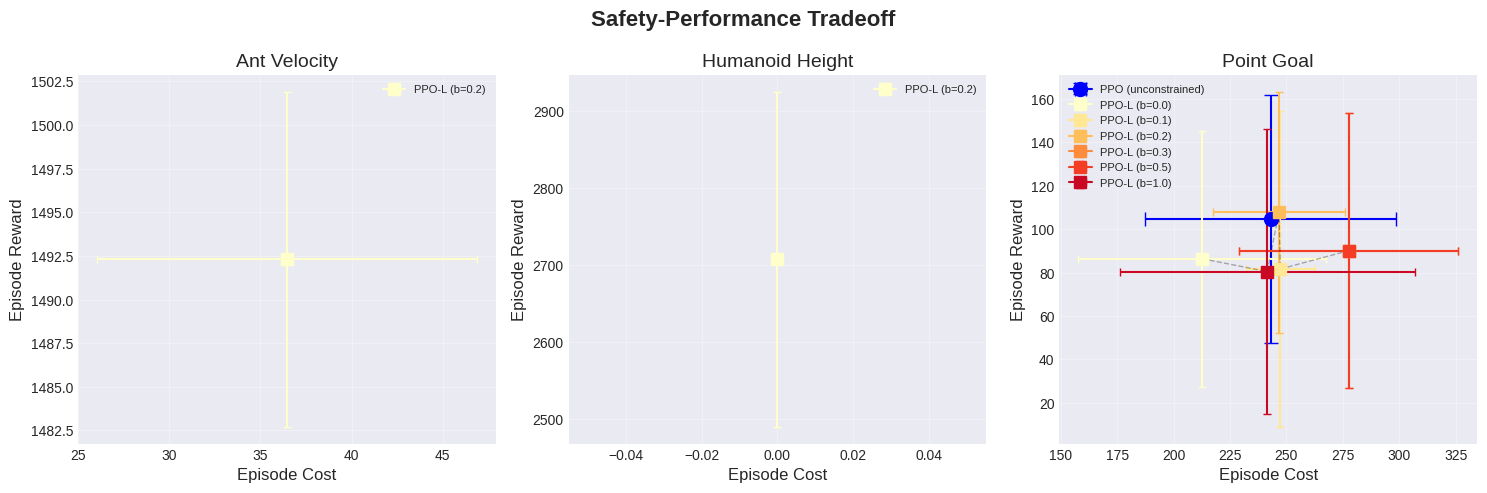

In [9]:
# Tradeoff plot combining all bounds
save_path = os.path.join(output_dir, "safety_performance_tradeoff.png")
_ = create_safety_performance_tradeoff(runs_data, save_path=save_path)


## 8. Summary Table


In [10]:
# Build and save summary table
summary_df = create_summary_table(runs_data, safety_bound=0.2)
summary_df


,Environment,Algorithm,Safety Bound,Seeds,Mean Reward,Mean Cost
0,ant_velocity_constrained,PPO-Lagrange,0.2,5,1492.3 ± 8.6,36.4 ± 9.3
1,humanoid_height_constrained,PPO-Lagrange,0.2,5,2707.5 ± 194.8,0.0 ± 0.0
2,safe_point_goal,PPO,N/A,5,104.9 ± 51.1,243.1 ± 49.8
3,safe_point_goal,PPO-Lagrange,0.2,5,107.9 ± 49.6,246.7 ± 26.1


In [11]:
# Save summary to CSV
csv_path = os.path.join(output_dir, 'experiment_summary.csv')
summary_df.to_csv(csv_path, index=False)
print('Saved summary to', csv_path)


Saved summary to ../plots/thesis_figures/experiment_summary.csv


## 9. Copy Generated Plots into Thesis Figures


In [12]:
# Copy all generated plots to thesis figures directory
import shutil

thesis_figures_dir = '../thesis/6873d12a507dfe00bbdae442/figures'
os.makedirs(thesis_figures_dir, exist_ok=True)

# List all PNG files in output directory
plot_files = glob(os.path.join(output_dir, '*.png'))

print(f'Copying {len(plot_files)} plots to thesis directory...')
for plot_file in plot_files:
    filename = os.path.basename(plot_file)
    dest_path = os.path.join(thesis_figures_dir, filename)
    shutil.copy2(plot_file, dest_path)
    print('  Copied:', filename)

print('\nAll plots copied to', thesis_figures_dir)


Copying 12 plots to thesis directory...
  Copied: safe_point_goal_lambda_evolution.png
  Copied: humanoid_height_constrained_final_performance.png
  Copied: humanoid_height_constrained_lambda_evolution.png
  Copied: safety_performance_tradeoff.png
  Copied: ant_velocity_constrained_final_performance.png
  Copied: ant_velocity_constrained_lambda_evolution.png
  Copied: point_resetting_goal_random_hazard_lidar_sensor_obs_final_performance.png
  Copied: point_resetting_goal_random_hazard_lidar_sensor_obs_learning_curves.png
  Copied: safe_point_goal_final_performance.png
  Copied: safe_point_goal_learning_curves.png
  Copied: ant_velocity_constrained_learning_curves.png
  Copied: humanoid_height_constrained_learning_curves.png

All plots copied to ../thesis/6873d12a507dfe00bbdae442/figures
